In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [3]:
transform = transforms . Compose ([ transforms . ToTensor () ,
transforms . Normalize ((0.5 , ) ,
(0.5 ,) ) ])
trainset = datasets . FashionMNIST ( ' ~/. pytorch / F_MNIST_data / ' ,
download = True , train = True , transform = transform )
trainloader = torch . utils . data . DataLoader ( trainset , batch_size
=32 , shuffle = True )
testset = datasets . FashionMNIST ( ' ~/. pytorch / F_MNIST_data / ' ,
download = True , train = False , transform = transform )
testloader = torch . utils . data . DataLoader ( testset , batch_size =32 ,
shuffle = False )

100%|██████████| 26421880/26421880 [00:03<00:00, 8641520.30it/s]


Extracting  ~/. pytorch / F_MNIST_data / /FashionMNIST/raw/train-images-idx3-ubyte.gz to  ~/. pytorch / F_MNIST_data / /FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 2996439.04it/s]


Extracting  ~/. pytorch / F_MNIST_data / /FashionMNIST/raw/train-labels-idx1-ubyte.gz to  ~/. pytorch / F_MNIST_data / /FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6710191.42it/s]


Extracting  ~/. pytorch / F_MNIST_data / /FashionMNIST/raw/t10k-images-idx3-ubyte.gz to  ~/. pytorch / F_MNIST_data / /FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15601356.21it/s]

Extracting  ~/. pytorch / F_MNIST_data / /FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to  ~/. pytorch / F_MNIST_data / /FashionMNIST/raw



In [4]:
batch = next ( iter ( trainloader ) )
print ( batch [0]. shape , batch [1]. shape )

torch.Size([32, 1, 28, 28]) torch.Size([32])


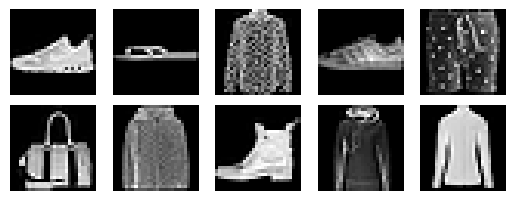

In [7]:
import matplotlib . pyplot as plt
f , ax = plt . subplots (2 , 5)
plt . subplots_adjust ( bottom =0.3 , top =0.7 , hspace =0)
for i in range (2) :
    for j in range (5) :
        image , label = next ( iter ( trainloader ) )
        ax [ i ][ j ]. set_axis_off ()
        ax [ i ][ j ]. imshow ( image [0 ,0 ,:] , cmap = 'gray')

In [27]:
# Define the model building function
def build_model(input_size, hidden_layers, output_size, activation_fn):
    layers = [nn.Linear(input_size, hidden_layers[0]), activation_fn()]
    for i in range(1, len(hidden_layers)):
        layers.append(nn.Linear(hidden_layers[i-1], hidden_layers[i]))
        layers.append(activation_fn())
        layers.append(nn.Dropout(0.2))
    layers.append(nn.Linear(hidden_layers[-1], output_size))
    return nn.Sequential(*layers)

def train_model(model, trainloader, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        total = 0
        correct = 0
        for images, labels in trainloader:
            images = images.view(images.size(0), -1)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Calculate training accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    training_accuracy = correct / total
    return training_accuracy

# Evaluation function
def evaluate_model(model, testloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            images = images.view(images.size(0), -1)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total


In [29]:
# Experiment configurations
network_structures = [[32], [64], [128], [32, 16], [64, 32, 16]]
input_size = 28*28  # 784 input features
output_size = 10    # 10 classes
num_epochs = 1000     # Reduced for quicker experimentation

results = []

# Experiment with different network structures
for structure in network_structures:
    model = build_model(input_size, structure, output_size, nn.ReLU)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    training_accuracy = train_model(model, trainloader, criterion, optimizer, num_epochs)
    test_accuracy = evaluate_model(model, testloader)
    results.append({
        'structure': structure, 
        'activation_function': 'ReLU', 
        'training_accuracy': training_accuracy, 
        'test_accuracy': test_accuracy
    })

# Find the best performing structure
best_structure = max(results, key=lambda x: x['test_accuracy'])['structure']
print(best_structure)

activation_functions = [nn.ReLU, nn.Sigmoid, nn.ELU, nn.LeakyReLU]

# Experiment with different activation functions on the best performing structure
for activation_fn in activation_functions:
    model = build_model(input_size, best_structure, output_size, activation_fn)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    training_accuracy = train_model(model, trainloader, criterion, optimizer, num_epochs)
    test_accuracy = evaluate_model(model, testloader)
    results.append({
        'structure': best_structure, 
        'activation_function': activation_fn.__name__, 
        'training_accuracy': training_accuracy, 
        'test_accuracy': test_accuracy
    })

# Print the results
for result in results:
    print(f"Structure: {result['structure']}, "
          f"Activation Function: {result['activation_function']}, "
          f"Training Accuracy: {result['training_accuracy']:.2f}%, "
          f"Testing Accuracy: {result['test_accuracy']:.2f}%")

# Summarize insights here

Structure: [32], Activation Function: ReLU, Training Accuracy: 0.87%, Testing Accuracy: 0.86%
Structure: [64], Activation Function: ReLU, Training Accuracy: 0.88%, Testing Accuracy: 0.86%
Structure: [128], Activation Function: ReLU, Training Accuracy: 0.88%, Testing Accuracy: 0.86%
Structure: [32, 16], Activation Function: ReLU, Training Accuracy: 0.84%, Testing Accuracy: 0.85%
Structure: [64, 32, 16], Activation Function: ReLU, Training Accuracy: 0.84%, Testing Accuracy: 0.85%
Structure: [128], Activation Function: ReLU, Training Accuracy: 0.88%, Testing Accuracy: 0.87%
Structure: [128], Activation Function: Sigmoid, Training Accuracy: 0.85%, Testing Accuracy: 0.83%
Structure: [128], Activation Function: ELU, Training Accuracy: 0.88%, Testing Accuracy: 0.86%
Structure: [128], Activation Function: LeakyReLU, Training Accuracy: 0.88%, Testing Accuracy: 0.87%
